# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

## 1 - Descrizione del problema

Il problema è determinare se una transazione è fraudolenta oppure no.

### 1.1 - Descrizione del Dataset

Le colonne del dataset sono così definite : 
- step: rappresenta un'unita di tempo 1 = 1 ora
- type: tipo di transazione
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction
- isFlaggedFraud : il risultato del modello predittivo

## 2- Analisi esplorativa

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
transactions = pd.read_csv("../data/data.csv")
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Estraiamo dal dataframe tutte le informazioni statistiche e gli aggiungiamo anche altre due informazione
che possono essere utili per capire la distribuzione dei dati, ovvero il numero di valori distinti e il numero
di valori nulli.

In [122]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                 "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                 "isFraud", "isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
valori distinti,7.430000e+02,5.316900e+06,1.845844e+06,2.682586e+06,3.614697e+06,3.555499e+06,2.000000e+00,2.000000e+00
valori nulli,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 2.1 - Grafici

Ho creato dei grafici per le transazioni fraudolente per far capire (graficamente) quanto il numero di istanze
siano differenti e quanto il tipo di transazione (colonna "type") incida.

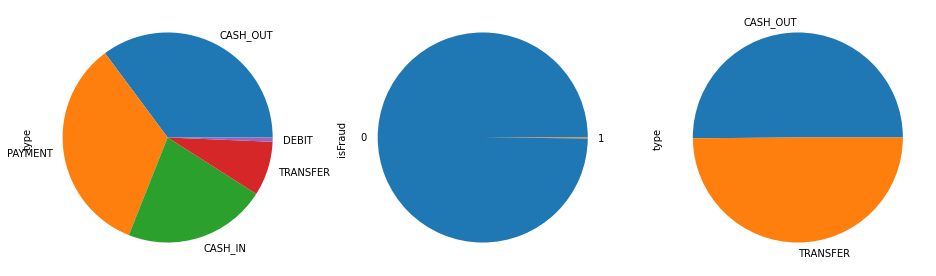

In [123]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

In [124]:
feature_list = ["type","amount","oldbalanceOrg","newbalanceOrig"] ##### ????

Per visualizzare le feauter si può procedere in diversi modi. Quello proposto in questo progetto è la creazione
di n grafici che combina 2 feature alla volta. Questo approccio può andare bene se il numero di feature è ridotto (<10)
altrimenti bisogna procedere a buon senso creando manualmente i grafici di quelle feature che potrebbero essere
in qualche modo dipendente.

Per fare questo esperimento usiamo un numero di istanze maggiori per avere una porzione di dataset più significativa.

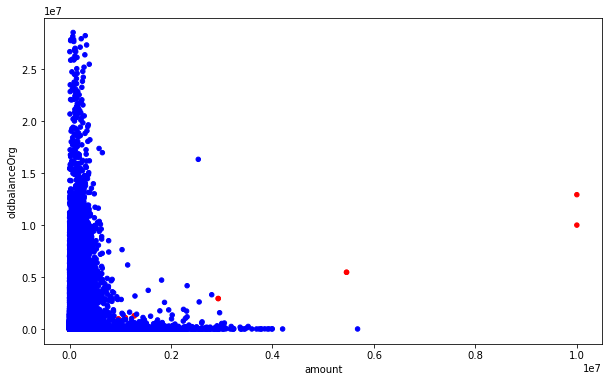

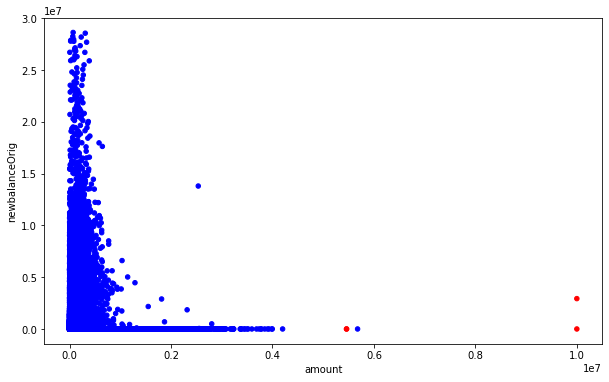

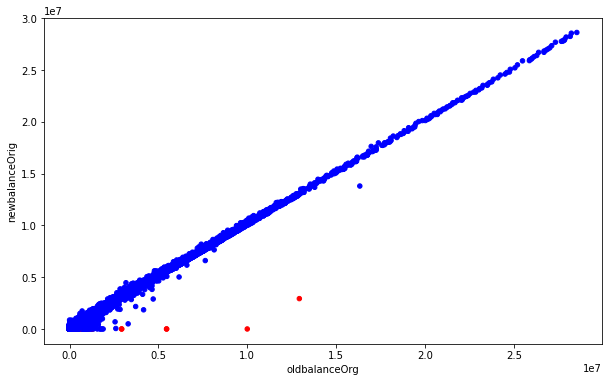

In [125]:
transactions = pd.read_csv("../data/data.csv", nrows=40_000)
tfraut_colors = transactions["isFraud"].map({0: "blue", 1: "red"})
for f_i in range(1,len(feature_list)):
     for f_j in range(f_i + 1, len(feature_list)) :        
        transactions.plot.scatter(feature_list[f_i], feature_list[f_j], c=tfraut_colors, figsize=(10, 6));

## 3 - Normalizzazione dei dati

In questo progetto non abbiamo molte pre-elaborazioni da fare, dato il numero ridotto di feature.

Per prima cosa dividiamo le feature in due categorie (perchè andranno poi trattate diversamente) :
   - Feature Numeriche : Possiamo applicare una normalizzazione dei dati per avere la stessa scala
   - Feature Categoriche : Applichiamo una categorizzazione. L'unica colonna da trattare in questo caso è 
       il tipo di transazione. Da questa operazioone de derivano altre 5.

In [126]:
feature_numeric = ["amount","oldbalanceOrg","newbalanceOrig"]
feature_categorical = ["type"]

Grazie alla classe ColumnTransformer possiamo applica entrambe queste trasformazioni in modo semplice.
L'oggeto ColumnTrasn lo memorizziamo in una variabile così lo possiamo riutilizzare anche per la creazione dei modelli nelle fasi successive

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

preproc = ColumnTransformer([
    ("numeric",StandardScaler(),feature_numeric),
        ("categorical",OneHotEncoder(),feature_categorical)
    ],remainder="drop")

Il risultato saranno quindi le 3 colonne numeriche ("amount", "oldbalanceOrg", "newbalanceOrig") dove abbiamo applicato una normalizzazione e le 5 colonne derivate dalla trasformazione della variabile categorica type nelle sue n componenti binarie, una per ogni valore distinto di type (in questo dataset sono 5 : CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)

In [128]:
X_sample = transactions[feature_numeric + feature_categorical]
preproc.fit_transform(X_sample)
f_names = feature_numeric + list(preproc.named_transformers_["categorical"].get_feature_names())
pd.DataFrame(
    preproc.transform(X_sample),
    columns = f_names
).head(10)

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,-0.439241,-0.266896,-0.273043,0.0,0.0,0.0,1.0,0.0
1,-0.464742,-0.331287,-0.333001,0.0,0.0,0.0,1.0,0.0
2,-0.470125,-0.340399,-0.341250,0.0,0.0,0.0,0.0,1.0
3,-0.470125,-0.340399,-0.341250,0.0,1.0,0.0,0.0,0.0
4,-0.433394,-0.322506,-0.328533,0.0,0.0,0.0,1.0,0.0
5,-0.445706,-0.317184,-0.321659,0.0,0.0,0.0,1.0,0.0
6,-0.447976,-0.261248,-0.266324,0.0,0.0,0.0,1.0,0.0
7,-0.445566,-0.264322,-0.269670,0.0,0.0,0.0,1.0,0.0
8,-0.457835,-0.339322,-0.341250,0.0,0.0,0.0,1.0,0.0
9,-0.453636,-0.322434,-0.325769,0.0,0.0,1.0,0.0,0.0


### 3.1 - PCA

Con la decomposizione SVD (Single Value Decomposition) possiamo riportare una spazio k-dimensionale in uno spazio n-dimensionale. In questo progetto le dimensioni originali sono il numero di feature dopo aver applicato il pre-processing, quindi 8, in uno spazio bidimensionale, per poter visualizzare i dati in un classico grafico cartesiano.

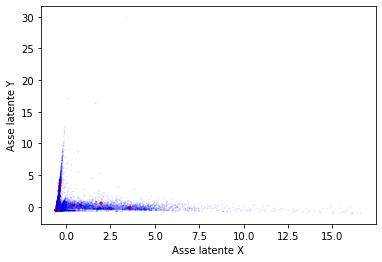

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

color_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
size_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: 0.25, 1:5.0})
alpha_blend_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: 0.1, 1:1})
x_preproc = pca.fit_transform(preproc.fit_transform(X_train))

plt.scatter(x_preproc[:,0], x_preproc[:,1], c=color_map, s=size_map, alpha=alpha_blend_map)
plt.xlabel('Asse latente X')
plt.ylabel('Asse latente Y')
plt.show()

## 4 - Modelli Predittivi

Data il grande numero di istanze in questo dataset alcuni modelli potrebbe crashare. Quindi riduciamo il dataset.

In [188]:
from sklearn.pipeline import Pipeline

transactions = pd.read_csv("../data/data.csv", nrows=100_000)
classes = ["isFraud", "Honest"]

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Predisponaimo alcune "Utility Function" che migliorano la leggibilità del codice e riusabilità. In particolare definiamo alcune funzioni per il calcolo delle accuratezze divise in :
 - Plotting Functions
 - Accurancy Functions
 - Others Functions

In [168]:
# Plotting Functions
def plot_separator_on_data(X, y, model=None):
    '''plot data into 2d space'''
    c_map = transactions[:X.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
    X = np.array(X)
    plt.figure(figsize=(8, 6));
    plt.scatter(X[:, 0], X[:, 1], c=c_map)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim)
        plt.ylim(ylim)
    return None

def separator_2d(model, x1):
    '''draw a 2d line based his equation'''
    w = model.coef_[0]
    b = model.intercept_[0]
    return -x1 * w[0] / w[1] - b / w[1]

In [237]:
# Accurancy Functions
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

def rmspe(y_real, y_pred):
    '''Root Mean Squared Percentage Error'''
    return np.sqrt(np.mean((y_pred / y_real - 1)**2))

def print_eval_regressor_tree(X, y, model, print_base=True):
    '''print eval for all regression tree model'''
    y_pred = model.predict(X)
    print(f"MSE   : {mean_squared_error(y, y_pred):12.4f}")
    print(f"RMSPE : {rmspe(y, y_pred):12.4f}")
    if print_base : print_eval_base(X,y,model)
    return None

def print_eval_base(X, y, model, pad = 3):
    '''print eval for all model, only R^2 score '''
    print(f"R^2{''.rjust(pad, ' ')}: {model.score(X,y):12.4f}")
    return None

def print_eval_classify(X, y, model, classes, print_base=True):
    '''print eval for classification model'''
    y_pred = model.predict(X)    
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix : ")
    print_matrix(classes, cm)
    print(f"\nPRECISION  : {precision_score(y, y_pred):12.4f}")
    print(f"RECALL     : {recall_score(y, y_pred):12.4f}")
    print(f"F1-MEASURE : {f1_score(y, y_pred, average='macro'):12.4f}")
    if print_base : print_eval_base(X, y, model, 8)
    return None

def verify(value, const, delta=0):
    if (value >= const-delta and value <= const-delta):
        print("ASSERT OK")
    else:
        print("ASSERT FAIL")

In [227]:
# Others Functions
def print_matrix(classes, matrix, pad = 10):
    '''This method prints a matrix with better formatting.
    Is used for print n x n confusion matrix'''
    for i in range(len(classes)):
        if i == 0 : 
            for c in ([" "] + classes):
                print(f"{c.rjust(pad, ' ')}",end=' ')
            print()
        for j in range(len(classes)):
            if (j == 0) : 
                print(f"{classes[i].rjust(pad, ' ')}",end=' ')
            print(f"{str(matrix[i][j]).rjust(pad, ' ')}",end=' ')
        print()
    return None

## 4.1 - Modelli di Regressione

Per usare questa parte biusogna aver intallato le seguenti librerie :

In [159]:
#%conda install XGBoost
#%conda install Lightgbm
#%conda install Catboost

Tenteremo di usare i seguenti modelli di previsione :
   - Random Forest
   - XGBRegressor
   - LightGBM
   - Logistic Loss

### 4.1.1 - Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ("preproc", preproc),
    ("RandomForestRegressor", RandomForestRegressor(max_samples=0.2, 
                                                    max_features="sqrt", 
                                                    n_estimators=200, 
                                                    max_depth=None, 
                                                    n_jobs=-1))
])
model.fit(X_train, y_train.values.ravel())
print_eval_regressor_tree(X_val, y_val.values.ravel(), model)

MSE   :       0.0007
RMSPE :          nan
R^2   :       0.2796


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))
C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))


Possiamo vedere l'importanza delle feature

In [161]:
pd.DataFrame(model.named_steps["RandomForestRegressor"].feature_importances_,index=f_names,columns=["value"]).T

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
value,0.509763,0.431428,0.031299,0.000239,0.010742,0.000922,0.002285,0.013322


### 4.1.2 - XGBoost

In [162]:
from xgboost import XGBRegressor

xgbm = XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025)
model = Pipeline([
    ("preproc", preproc),
    ("XGBRegressor", xgbm)
])
model.fit(X_train, y_train)
print_eval_regressor_tree(X_val, y_val.values.ravel(), model)
pd.DataFrame(model.named_steps["XGBRegressor"].feature_importances_,index=f_names,columns=["value"]).T

MSE   :       0.0005
RMSPE :          inf
R^2   :       0.5159


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))


,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
value,0.271632,0.269099,0.144768,0.000508,0.083357,0.065975,0.133163,0.031499


### 4.1.3 - LightGBM

In [186]:
from lightgbm import LGBMRegressor

model = Pipeline([
    ("preproc",preproc),
    ("LGBM", LGBMRegressor(n_estimators=1200))
])

model.fit(X_train, y_train.values.ravel())
print_eval_regressor_tree(X_val, y_val.values.ravel(), model)

MSE   :       0.0006
RMSPE :          inf


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))


R^2   :       0.4526


### 4.1.4 - Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

model_lr = Pipeline([
    ("preproc", preproc),
    ("LogisticRegression", LogisticRegression(solver="saga", random_state=43, class_weight={1:45}, max_iter=100000))
])

model_lr.fit(X_train, y_train.values.ravel())

print_eval_regressor_tree(X_val, y_val.values.ravel(), model_lr, False)
print_eval_classify(X_val, y_val.values.ravel(), model_lr, classes, True)

MSE   :       0.0028
RMSPE :          nan
Confusion Matrix : 
              isFraud     Honest 
   isFraud      33231         69 
    Honest         24         10 

PRECISION  :       0.1266
RECALL     :       0.2941
F1-MEASURE :       0.5878
R^2        :       0.9972


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/4018745772.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))
C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/4018745772.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))


Vediamo come la regressione logistica divide i dati

MSE   :       0.0023
RMSPE :          nan
R^2   :       0.9977
Confusion Matrix : 
              isFraud     Honest 
   isFraud      33250         38 
    Honest         38          8 

PRECISION  :       0.1739
RECALL     :       0.1739
F1-MEASURE :       0.5864
R^2        :       0.9977


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))
C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/2793296492.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean((y_pred / y_real - 1)**2))


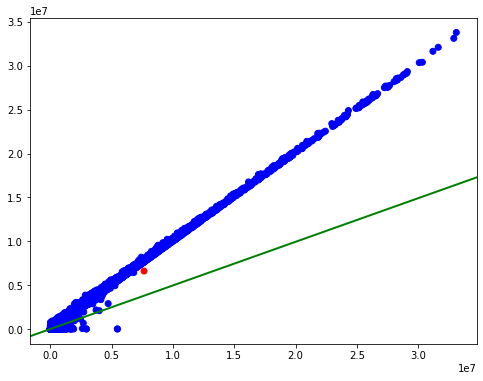

In [190]:
X_lr_2 = transactions[["oldbalanceOrg","newbalanceOrig"]]
y_lr_2 = transactions[["isFraud"]]

X_train_lr_2, X_val_lr_2, y_train_lr_2, y_val_lr_2 = train_test_split(X_lr_2, y_lr_2, test_size=1/3, random_state=43)

model_lr_2 = Pipeline([
    ("preproc", StandardScaler()),
    ("LogisticRegression", LogisticRegression(solver="saga", random_state=42, class_weight={1:45}, max_iter=100000))
])

model_lr_2.fit(X_train_lr_2, y_train_lr_2.values.ravel())

print_eval_regressor_tree(X_val_lr_2, y_val_lr_2.values.ravel(), model_lr_2, False)
print_eval_classify(X_val_lr_2, y_val_lr_2.values.ravel(), model_lr_2, classes; True)

plot_separator_on_data(X_val_lr_2, y_val_lr_2, model_lr_2.named_steps["LogisticRegression"]);

## 4.2 - Modelli di Classificazione

Dato che si tratta di un problema di classificazione binaria, proviamo ad usare per primi i modelli che fanno classificazione per poi passare ad algoritmi più avanzati. In questa sezione ho sviluppato e ottimizzato (senza grid search) i seguenti modelli :
- Alberi Decisionali
- XGBClassifier
- Support Vector Machine

### 4.2.1 - Alberi Decisionali

Confusion Matrix : 
              isFraud     Honest 
   isFraud      33298          2 
    Honest         31          3 

PRECISION  :       0.6000
RECALL     :       0.0882
F1-MEASURE :       0.5767
R^2        :       0.9990


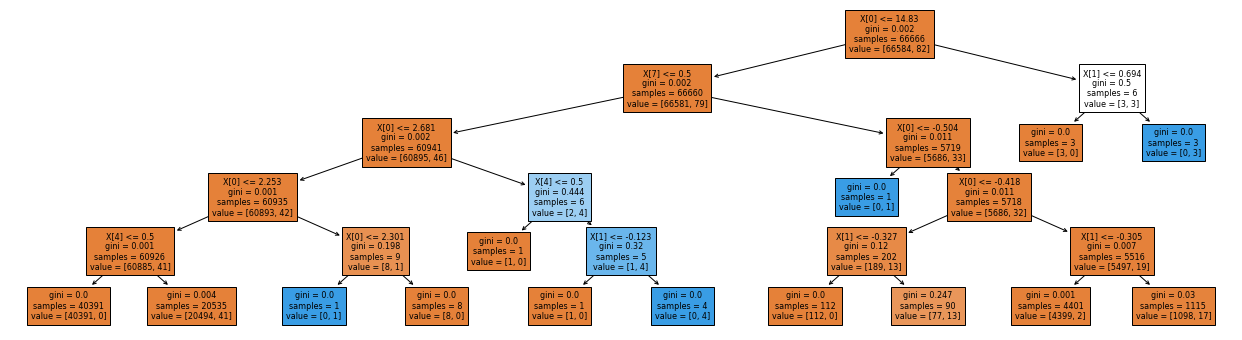

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model_dt = Pipeline([
    ("preproc", preproc),
    ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5,random_state=43))
])

model_dt.fit(X_train, y_train)
print_eval_classify(X_val, y_val, model_dt, classes)

plt.figure(figsize=(22, 6))
plot_tree(model_dt.named_steps["DecisionTreeClassifier"], max_depth=5, filled=True, fontsize=8);

I DecisionTree funzionano molto meglio dei modelli di regressione.

Vediamo quali spit fa stampando in maniera testuale l'albero di classificazione :

In [170]:
from sklearn.tree import export_text
print(export_text(model_dt.named_steps["DecisionTreeClassifier"], feature_names=f_names))

|--- amount <= 14.83
|   |--- x0_TRANSFER <= 0.50
|   |   |--- amount <= 2.68
|   |   |   |--- amount <= 2.25
|   |   |   |   |--- x0_CASH_OUT <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x0_CASH_OUT >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- amount >  2.25
|   |   |   |   |--- amount <= 2.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  2.30
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  2.68
|   |   |   |--- x0_CASH_OUT <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- x0_CASH_OUT >  0.50
|   |   |   |   |--- oldbalanceOrg <= -0.12
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldbalanceOrg >  -0.12
|   |   |   |   |   |--- class: 1
|   |--- x0_TRANSFER >  0.50
|   |   |--- amount <= -0.50
|   |   |   |--- class: 1
|   |   |--- amount >  -0.50
|   |   |   |--- amount <= -0.42
|   |   |   |   |--- oldbalanceOrg <= -0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldbalanceOrg >  -0.33
|   |   |   

### 4.2.2 - XGBClassifier

In [171]:
from xgboost import XGBClassifier 

model_xgb = Pipeline([
    ("preproc", preproc),
    ("XGBClassifier",
         XGBClassifier(objective='reg:squarederror', 
            learning_rate = 0.01577, reg_lambda=0.008, reg_alpha=0.0001, n_estimators=1025, use_label_encoder =False))
])

model_xgb.fit(X_train, y_train.values.ravel())
print_eval_classify(X_val, y_val, model_xgb, classes)

Confusion Matrix : 
              isFraud     Honest 
   isFraud      33297          3 
    Honest         17         17 

PRECISION  :       0.8500
RECALL     :       0.5000
F1-MEASURE :       0.8147
R^2        :       0.9994


### 4.2.3 - Support Vector Machines (SVM)

In [173]:
from sklearn.svm import SVC

model = Pipeline([
    ("preproc", preproc),
    ("SVM", SVC(random_state=43, C=0.1, degree=3))
])

model.fit(X_train, y_train.values.ravel())
print_eval_classify(X_val, y_val, model, classes)

Confusion Matrix : 
              isFraud     Honest 
   isFraud      33300          0 
    Honest         34          0 

PRECISION  :       0.0000
RECALL     :       0.0000
F1-MEASURE :       0.4997


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


R^2        :       0.9990


## 4.3 - Neural Network

Proviamo ora ad implementare un modello neurale e vedere se può risolvere anche lui il problema

Prima di procedere assicurarsi di aver installato la libreria TensorFlow.

In [174]:
#%conda install TensorFlow

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dropout

X_train_nn = preproc.fit_transform(X_train)
X_val_nn = preproc.transform(X_val)

model_nn = Sequential([
    Dense(32, activation="relu", input_dim=len(f_names)),
    Dense(8, activation="relu"),
    Dense(1)
])
model_nn.summary()
model_nn.compile(optimizer="adam", loss="mse",  metrics=["accuracy"])
fit_history = model_nn.fit(X_train_nn, y_train, batch_size=100, epochs=50)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 32)                288       
                                                                 
 dense_145 (Dense)           (None, 8)                 264       
                                                                 
 dense_146 (Dense)           (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
667/667 [==============================] - 1s 1ms/step - loss: 0.0031 - accuracy: 0.9977
Epoch 2/50
667/667 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 3/50
667/667 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 4/50
667/667 

In [211]:
loss, acc = model_nn.evaluate(X_val_nn, y_val)
print(f"Loss (MSE) : {loss:5.4f}")
print(f"Accurancy  : {acc:5.4f}")

1042/1042 [==============================] - 1s 1ms/step - loss: 9.5201e-04 - accuracy: 0.9990
Loss (MSE) : 0.0010
Accurancy  : 0.9990


Vediamo come possiamo grafica le misure d'errore

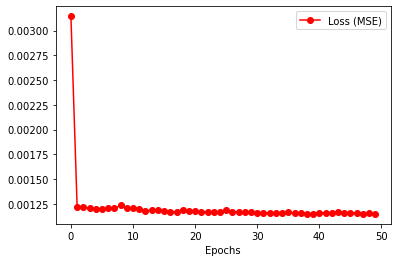

In [212]:
plt.plot(fit_history.history["loss"], "ro-")
plt.legend(["Loss (MSE)"])
plt.xlabel("Epochs");
plt.show();

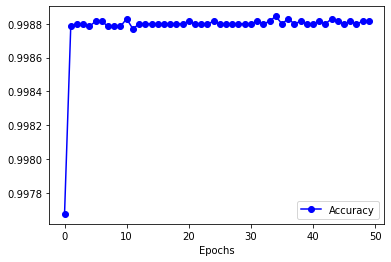

In [213]:
plt.plot(fit_history.history["accuracy"], "bo-")
plt.legend(["Accuracy"])
plt.xlabel("Epochs");
plt.show();

grazie alla classe KerasRegressor possiamo usare le potenzialità di Kerar unite al concetto di Pipeline, GridSearh ecc..
di scikit-lean

In [178]:
def build_nn(firstLayerNodes, inpDim):
    model = Sequential([
        Dense(firstLayerNodes, activation="relu", input_dim=len(f_names)),
        Dense(8, activation="relu"),
        Dense(1)
    ])
    model.summary()
    model.compile(optimizer="adam", loss="mse",  metrics=["accuracy"])
    return model

In [214]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(3, shuffle=True, random_state=42)

model = Pipeline([
    ("preproc", preproc),
    ("KerasRegressor", KerasRegressor(build_fn=build_nn, 
                                      batch_size=100, 
                                      epochs=10,
                                      firstLayerNodes=128, 
                                      inpDim=len(f_names) 
                                     )
    )
])

grid = {
    "KerasRegressor__firstLayerNodes": [8, 16, 64, 128]
}

gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train, y_train);

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 8)                 72        
                                                                 
 dense_148 (Dense)           (None, 8)                 72        
                                                                 
 dense_149 (Dense)           (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


C:\Users\Federico\AppData\Local\Temp/ipykernel_10564/3490373790.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("KerasRegressor", KerasRegressor(build_fn=build_nn,


445/445 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 2/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 3/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 4/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 5/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 6/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 7/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 8/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 9/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 10/10
223/223 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9987
Model: "se

445/445 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9989
Epoch 7/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9989
Epoch 8/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9989
Epoch 9/10
445/445 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9989
Epoch 10/10
223/223 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9987
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 16)                144       
                                                                 
 dense_163 (Dense)           (None, 8)                 136       
                                                                 
 dense_164 (Dense)           (None, 1)                 9         
                         

223/223 [==============================] - 0s 1ms/step - loss: 9.9562e-04 - accuracy: 0.9991
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 128)               1152      
                                                                 
 dense_175 (Dense)           (None, 8)                 1032      
                                                                 
 dense_176 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
445/445 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9987
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9989
Epoch 3/10
445/445 [==

In [215]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KerasRegressor__firstLayerNodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,5.642624,0.054596,0.374997,0.027534,16,{'KerasRegressor__firstLayerNodes': 16},-0.001253,-0.001345,-0.000964,-0.001187,0.000162,1
2,6.731754,0.487607,0.365691,0.011866,64,{'KerasRegressor__firstLayerNodes': 64},-0.001251,-0.001345,-0.000996,-0.001197,0.000148,2
0,5.720038,0.165898,0.362030,0.011399,8,{'KerasRegressor__firstLayerNodes': 8},-0.001310,-0.001377,-0.000930,-0.001206,0.000197,3
3,9.836353,0.847367,0.434250,0.007841,128,{'KerasRegressor__firstLayerNodes': 128},-0.001296,-0.001496,-0.000948,-0.001247,0.000226,4


Si poteva anche sviluppare una rete neurale ricorrente, ottimo per sequenze temporali, ma in questo caso il lavoro richiesto
per tale elaborazione è troppo ampio per la prima colonna step.

## 5 - Tuning degli Iperparametri

Per questa parte utilizziamo una porzione più ampia del datataset

In questa parte andremo ad suddividere il dataset in 3 parti e le useremo nel seguente modo :
   - Training Set : Per addestrare i modelli
   - Validation Set : Per vericare l'accuratteza dei modelli su dati mai visti in fase di training
   - Test Set : Per calcolare la confidenza

In [219]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(3, shuffle=True, random_state=42)

transactions = pd.read_csv("../data/data.csv", nrows=200_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

I modelli che meglio si sono comportati per questo esperimento sono stati, come ci si poteva aspettare,
i modelli di classificazione. Andiamo quindi a cercare i migliori iperparametri per i seguenti modelli : 
 - Logistic Regression
 - Alberi Decisionali
 - XGBClassifier

In [216]:
grid = {
    "LogisticRegression__penalty": ['l1','l2']
}

gs = GridSearchCV(model_lr, grid, cv=kf)
gs.fit(X_train, y_train.values.ravel())
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LogisticRegression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,3.931819,1.286041,0.009975,0.000001,l2,{'LogisticRegression__penalty': 'l2'},0.997435,0.996850,0.99775,0.997345,0.000373,1
0,24.617508,6.512549,0.010306,0.000469,l1,{'LogisticRegression__penalty': 'l1'},0.995095,0.993655,0.99442,0.994390,0.000588,2


In [217]:
grid = {
    "DecisionTreeClassifier__max_depth": [5,10]
}

gs = GridSearchCV(model_dt, grid, cv=kf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DecisionTreeClassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084774,0.003733,0.010306,0.000470,5,{'DecisionTreeClassifier__max_depth': 5},0.998695,0.998515,0.998965,0.998725,0.000185,1
1,0.095079,0.007523,0.010306,0.000471,10,{'DecisionTreeClassifier__max_depth': 10},0.998695,0.998425,0.998560,0.998560,0.000110,2


In [218]:
grid = {
    "XGBClassifier__n_estimators": [10,20,30]
}

gs = GridSearchCV(model_xgb, grid, cv=kf)
gs.fit(X_train, y_train.values.ravel())
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBClassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.489363,0.004021,0.025926,7.025149e-06,20,{'XGBClassifier__n_estimators': 20},0.998695,0.998515,0.998875,0.998695,0.000147,1
0,0.275928,0.006166,0.025599,4.701903e-04,10,{'XGBClassifier__n_estimators': 10},0.998695,0.998515,0.998830,0.998680,0.000129,2
2,0.695141,0.005642,0.025931,2.247832e-07,30,{'XGBClassifier__n_estimators': 30},0.998695,0.998470,0.998875,0.998680,0.000166,2


## 6 -  Valutazione

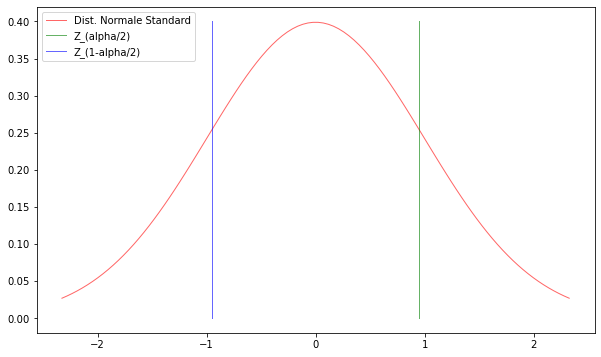

In [224]:
# da mettere nella funzione bernoulli_process
from scipy.stats import norm
confidence = 0.95
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
y = norm.pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'r-', lw=1, alpha=0.6, label='Dist. Normale Standard')
x = [confidence]*100
y = np.linspace(0.0,0.4,100)
plt.plot(x, y, 'g-', lw=1, alpha=0.6, label='Z_(alpha/2)')
x = [-confidence]*100
plt.plot(x, y, 'b-', lw=1, alpha=0.6, label='Z_(1-alpha/2)');
plt.legend(loc='upper left')
plt.show()

Possiamo stimare l'accuratezza sui nuovi dati con un processo Bernoulliano, per prima cosa ci creiamo una mappa che mi permete di calcolare, data una certa confidenza, il valore di $$Z_{\alpha/2}$$ 

In [221]:
Za2_map = {0.99:2.58,0.98:2.33,0.95:1.96,0.90:1.65}

Implementiamo la funzione per il calcolo del processso Bernoulliano

In [222]:
def bernoulli_process(acc, p_value, N) :
    '''this method calculate the interval confidence based on Bernoulli Process'''
    Za2 = Za2_map[p_value]
    
    num = 2*N*acc+Za2**2
    sqrt = np.sqrt(Za2**2+4*N*acc-4*N*acc**2)
    den = 2*(N+Za2**2)
    
    return (num - Za2*sqrt) / den, (num + Za2*sqrt) / den

Questa sottostante è una cella di test, in particolare si riferisce all'esempio riportato sulla slide 4 del pacco di slide "ValutazioneModelliDiClassificazione", per vedere se il metodo implementato funziona correttamente

In [245]:
accurancy = 0.8
N = 100
confidence = 0.95
p_min, p_max = bernoulli_process(accurancy, confidence, N)
verify(p_min, 0.711, 0.01)
verify(p_max, 0.866, 0.01)
p_min, p_max, accurancy = p_min * 100, p_max * 100, accurancy * 100
print(f"L'accuratezza del modello migliore è :\n{accurancy:2.2f} % \u00B1 [{p_min:2.2f} %, {p_max:2.2f} %]")

0.7111690380734977 0.711 0.01
ASSERT OK
0.8666340774409012 0.866 0.01
ASSERT OK
L'accuratezza del modello migliore è :
80.00 % ± [71.12 %, 86.66 %]


Verifichiamo quanto il modello è preciso su dati mai visti 

In [225]:
accurancy = gs.best_estimator_.score(X_test, y_test)
N = X_test.shape[0]
confidence = 0.95
p_min, p_max = bernoulli_process(accurancy, confidence, N)
p_min, p_max, accurancy = p_min * 100, p_max * 100, accurancy * 100
print(f"L'accuratezza del modello migliore è :\n{accurancy:2.2f} % \u00B1 [{p_min:2.2f} %, {p_max:2.2f} %]")

L'accuratezza del modello migliore è :
99.93 % ± [99.90 %, 99.95 %]


## 7 - Conclusioni

## 8 - Resources
Le risorse che ho utilizzato sono le seguenti :
i notebook dei laboratori della BBBBB, CC,eee. Tutte le slide di teoria in merito anche per la determinazione dasa
Link al dataset di kaggle : https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset